In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stumbleupon/test.tsv
/kaggle/input/stumbleupon/train.tsv
/kaggle/input/stumbleupon/sampleSubmission.csv
/kaggle/input/stumbleupon/raw_content.zip


***DATA ANALYSIS***

In [45]:
df.is_news.value_counts()

1    4552
0    2843
Name: is_news, dtype: int64

In [46]:

raw_df = pd.read_csv('/kaggle/input/stumbleupon/train.tsv', sep='\t')
df = raw_df.copy()
del df['framebased']
del df['urlid']
del df['alchemy_category_score']
df['is_news'] = df['is_news'].str.replace('?', '0').astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


**Transpose array** ******

In [44]:
df.sample(2).T

,2121,2234
url,http://www.foodnetwork.com/recipes/food-networ...,http://tastykitchen.com/recipes/desserts/baby-...
boilerplate,"{""title"":""Chocolate Covered Peanut Butter Chee...","{""title"":""Baby Grand Marnier Cheesecakes Tasty..."
alchemy_category,business,business
avglinksize,2.53913,1.754098
commonlinkratio_1,0.759936,0.457447
commonlinkratio_2,0.499205,0.164894
commonlinkratio_3,0.18124,0.058511
commonlinkratio_4,0.068362,0.0
compression_ratio,0.48204,0.447552
embed_ratio,0.0,0.0


In [6]:
df.iloc[0].url

'http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html'

In [7]:
df.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

<AxesSubplot:ylabel='alchemy_category'>

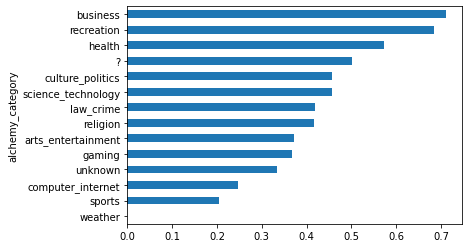

In [8]:
df.groupby('alchemy_category').label.mean().sort_values().plot.barh()

In [9]:
df.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)

,mean,count
alchemy_category,,
?,0.502135,2342
recreation,0.684296,1229
arts_entertainment,0.371945,941
business,0.711364,880
health,0.573123,506
sports,0.205263,380
culture_politics,0.457726,343
computer_internet,0.246622,296
science_technology,0.456747,289


**Correlation** 

In [10]:
df.corr()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
avglinksize,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,-0.049270,-0.002046,0.018974,-0.003002,-0.064014,0.020852,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172
commonlinkratio_1,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,0.006790,-0.201501,-0.064435,0.082044,0.421284,0.257200,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364
commonlinkratio_2,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,0.000263,-0.159702,-0.044663,0.076389,0.398817,0.257594,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488
commonlinkratio_3,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,-0.218559,-0.031097,-0.133370,-0.050357,0.082562,0.363159,0.109654,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964
commonlinkratio_4,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,-0.178064,-0.052519,-0.136561,-0.038071,0.112934,0.287159,0.059223,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464
compression_ratio,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,0.159335,0.027657,0.106335,-0.188976,-0.122866,-0.090325,0.146470,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737
embed_ratio,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,-0.130753,-0.026473,-0.090938,0.183808,0.083488,0.075322,-0.108476,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536
frameTagRatio,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,1.000000,0.010193,0.384937,-0.088847,0.040760,-0.196673,0.158874,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762
hasDomainLink,-0.002046,0.006790,0.000263,-0.031097,-0.052519,0.027657,-0.026473,0.010193,1.000000,0.009665,-0.003890,-0.022449,0.008579,0.022583,-0.017361,0.013678,0.058085,0.051330,0.008718,-0.004863
html_ratio,0.018974,-0.201501,-0.159702,-0.133370,-0.136561,0.106335,-0.090938,0.384937,0.009665,1.000000,-0.172924,-0.040634,-0.215809,-0.141363,-0.136550,-0.455636,-0.042001,-0.183350,0.013860,-0.051149


<AxesSubplot:>

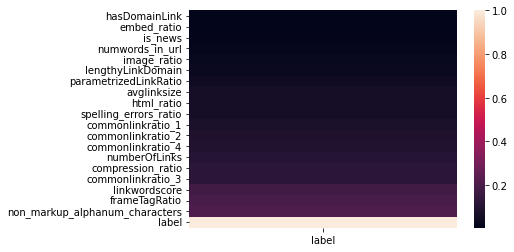

In [11]:
import seaborn as sns
sns.heatmap(df.corr('spearman').abs()[['label']].sort_values('label'))




<AxesSubplot:>

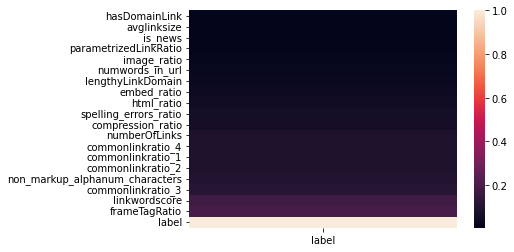

In [12]:

sns.heatmap(df.corr('pearson').abs()[['label']].sort_values('label'))

<AxesSubplot:xlabel='label', ylabel='linkwordscore'>

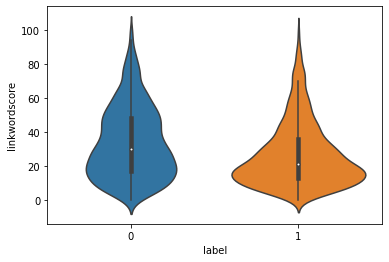

In [13]:
sns.violinplot(x='label', y='linkwordscore', data=df)


In [14]:
features_df = df.drop('label', axis=1)
num_features = features_df.select_dtypes(np.number)
num_features.sample(5)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
5153,2.402778,0.525140,0.22905,0.103352,0.083799,0.506649,0.000000,0.023203,0,0.161536,0.435606,1,1,25,10418,358,5,0.304469,0.077206
6032,1.833333,0.000000,0.00000,0.000000,0.000000,21.000000,-1.000000,0.262136,0,0.276897,-1.000000,1,0,16,244,8,4,0.000000,0.000000
3368,2.000000,0.000000,0.00000,0.000000,0.000000,0.460928,0.001439,0.000000,0,0.405581,0.000000,0,0,1,3376,2,0,0.000000,0.106038
3905,1.644068,0.385827,0.07874,0.023622,0.000000,0.520604,0.000000,0.018973,0,0.202603,0.063604,1,0,7,11002,127,5,0.015748,0.116788
6089,0.884615,0.118644,0.00000,0.000000,0.000000,0.331220,0.000000,0.049180,0,0.183069,0.288770,1,0,12,1755,59,7,0.050847,0.043137


num_features.columns()

In [15]:
num_features.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'],
      dtype='object')

In [16]:
num_features.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.615551,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.486498,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

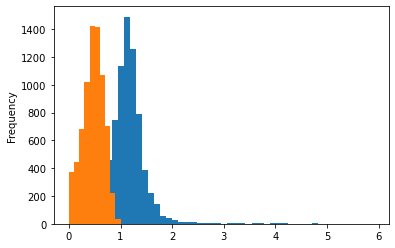

In [17]:
num_features.avglinksize.apply(np.log1p).plot.hist(bins=50)
num_features.commonlinkratio_1.plot.hist()

In [18]:
cat_features = df.select_dtypes(include=[np.object])

cat_features.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,url,boilerplate,alchemy_category,news_front_page
4375,http://blogs.babble.com/family-kitchen/2011/01...,"{""title"":""Spaghetti with Mozzarella Stuffed Me...",business,0
2107,"http://www.health.com/health/article/0,,204116...","{""title"":""25 Random Things About Health Mind B...",health,0
5077,http://www.miaminewtimes.com/slideshow/closer-...,"{""url"":""miaminewtimes slideshow closer look ac...",?,0
369,http://www.pennlive.com/midstate/index.ssf/201...,"{""title"":""NCAA decision on Penn State All wins...",sports,0
6468,http://angiplast.com/iv-cannula.htm,"{""title"":""IV Cannula Manufacturer India Dispos...",?,0


In [19]:
df.is_news.value_counts()

1    4552
0    2843
Name: is_news, dtype: int64

In [20]:
cat_features.sample(5)

,url,boilerplate,alchemy_category,news_front_page
6659,http://techcrunch.com/2012/12/23/the-20-best-i...,"{""url"":""techcrunch 2012 12 23 the 20 best ios ...",computer_internet,0
492,http://www.dallasobserver.com/slideshow/blonde...,"{""url"":""dallasobserver slideshow blondes vs br...",sports,0
933,http://macromeme.com/dog/dog-snow-slide.html,"{""title"":"" "",""body"":"" "",""url"":""macromeme dog d...",?,0
2385,http://gizmodo.com/5991940/3-beer+bas-_recipes...,"{""url"":""gizmodo 5991940 3 beer bas recipes for...",recreation,0
2305,http://9joke.net/why-tea-is-so-very-magical/,"{""title"":""Why tea is so very magical "",""body"":...",?,0


In [21]:
cat_features.iloc[1].boilerplate

'{"title":"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races","body":"And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a trigger and the race starts Boom What people don t consider When a conventional gun goes off the sound travels to the ears of the closest runner a fraction of a second sooner than the others That s just enough to matter and why the latest starting pistol has traded in the mechanical boom for orchestrated electronic noise Omega has been the watch company tasked as the official timekeeper of the Olympic Games since 1932 At the 2010 Vancouv

In [22]:
cat_features = df.select_dtypes(include=[np.object])
cat_features = cat_features[['alchemy_category', 'news_front_page']]
cat_features.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,alchemy_category,news_front_page
0,business,0
1,recreation,0
2,health,0
3,health,0
4,sports,0


In [23]:
pd.get_dummies(cat_features).head(5)

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [24]:
pd.get_dummies(cat_features[['alchemy_category']]).shape

(7395, 14)

In [25]:
cat_features.alchemy_category.nunique()

14

**MODELISATION**

In [26]:
features_df=pd.concat([num_features,pd.get_dummies(cat_features)],axis=1)

features_df.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'alchemy_category_?',
       'alchemy_category_arts_entertainment', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_culture_politics', 'alchemy_category_gaming',
       'alchemy_category_health', 'alchemy_category_law_crime',
       'alchemy_category_recreation', 'alchemy_category_religion',
       'alchemy_category_science_technology', 'alchemy_category_sports',
       'alchemy_category_unknown', 'alchemy_category_weather',
       'news_front_page_0', 'news_front_page_1', 'news_front_page_?'],
      dtype='object')

In [27]:
target=df['label']
target.shape

(7395,)

**SPLIT DATA**

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25)
x_train.head(5)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
3583,1.388489,0.508532,0.180887,0.153584,0.112628,0.449169,0.000000,0.022425,0,0.188048,...,0,0,0,0,0,0,0,0,0,1
6916,2.427184,0.560748,0.214953,0.102804,0.037383,21.000000,-1.000000,0.080386,0,0.249328,...,0,1,0,0,0,0,0,1,0,0
1697,2.014925,0.643123,0.442379,0.371747,0.323420,0.465228,0.001582,0.017458,0,0.212689,...,0,0,0,0,0,0,0,0,0,1
3145,1.141509,0.357798,0.091743,0.009174,0.009174,0.441446,0.000000,0.045455,0,0.264169,...,0,1,0,0,0,0,0,1,0,0
6590,3.358553,0.674772,0.392097,0.191489,0.121581,0.615278,0.000000,0.027804,0,0.200271,...,0,0,0,0,0,0,0,0,0,1


In [29]:
y_train.head(5)

3583    1
6916    1
1697    1
3145    1
6590    0
Name: label, dtype: int64

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier


**RANDOMFORESTCLASSIFIER**

In [31]:
baseline = DummyClassifier(strategy='most_frequent')
model =RandomForestClassifier()

In [32]:
baseline.fit(x_train,y_train)
model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
baseline.predict(x_test).mean()



1.0

In [34]:
model.predict(x_test).mean()

0.4856679286100595

In [35]:
y_train.mean()

0.5201947349441038

**TEST DATA****

In [36]:
from sklearn.metrics import classification_report
baseline_predictions = baseline.predict(x_test)
model_predictions = model.predict(x_test)
print(classification_report(y_test, baseline_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       938
           1       0.49      1.00      0.66       911

    accuracy                           0.49      1849
   macro avg       0.25      0.50      0.33      1849
weighted avg       0.24      0.49      0.33      1849



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       938
           1       0.71      0.70      0.70       911

    accuracy                           0.71      1849
   macro avg       0.71      0.71      0.71      1849
weighted avg       0.71      0.71      0.71      1849



In [38]:
features_df

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.090774,0,0.245831,...,0,0,0,0,0,0,0,1,0,0
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0.098707,0,0.203490,...,0,1,0,0,0,0,0,1,0,0
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0.072448,0,0.226402,...,0,0,0,0,0,0,0,1,0,0
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0.095861,0,0.265656,...,0,0,0,0,0,0,0,1,0,0
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0.024908,0,0.228887,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0.177043,0,0.256669,...,0,0,0,0,0,0,0,1,0,0
7391,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0.057377,0,0.218014,...,0,0,0,0,0,0,0,1,0,0
7392,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0.124122,0,0.248388,...,0,1,0,0,0,0,0,1,0,0
7393,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0.097778,0,0.256070,...,0,0,0,0,0,0,0,0,1,0


In [42]:
test_df = pd.read_csv('/kaggle/input/stumbleupon/train.tsv', sep='\t')
test_df['is_news'] = test_df['is_news'].str.replace('?', '0').astype(int) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
